In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from Image_reading import *
from Color_descriptors import *

In [2]:
#   Parameters defintion:
n1=251 # First image (included)
n2=1001 # Last image (excluded)
n_img=1 # number of images per object
color_space='hsv'
bins=[4,4,4]

#     First, we regroup the images features in a single 2D-Array where each line is the feature vector of the image
X_all=[]
for i in range(n_img*(n2-n1)):
    X_all.append([])
for i in range(n2-n1):
    for j in range(n_img):
        X=read_image_1(i+n1,j)
        # ********************Color_features***********************
        hist= color_histogram(X,color_space,bins)
        X_all[n_img*i+j]=X_all[n_img*i+j]+[hist]
        moments_ftr=moments_calcul(X,color_space)
        X_all[n_img*i+j]=X_all[n_img*i+j]+[moments_ftr]
        X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])

X_all=np.array(X_all).astype(float)
print("Number of objects= "+ str(n2-n1))
print("Number of images= "+ str(X_all.shape[0]))
print("Number of features= "+ str(X_all.shape[1]))
print("\n")

Number of objects= 750
Number of images= 750
Number of features= 79




In [ ]:
# *********************Normalization**********************
X_norm = StandardScaler().fit_transform(X_all)

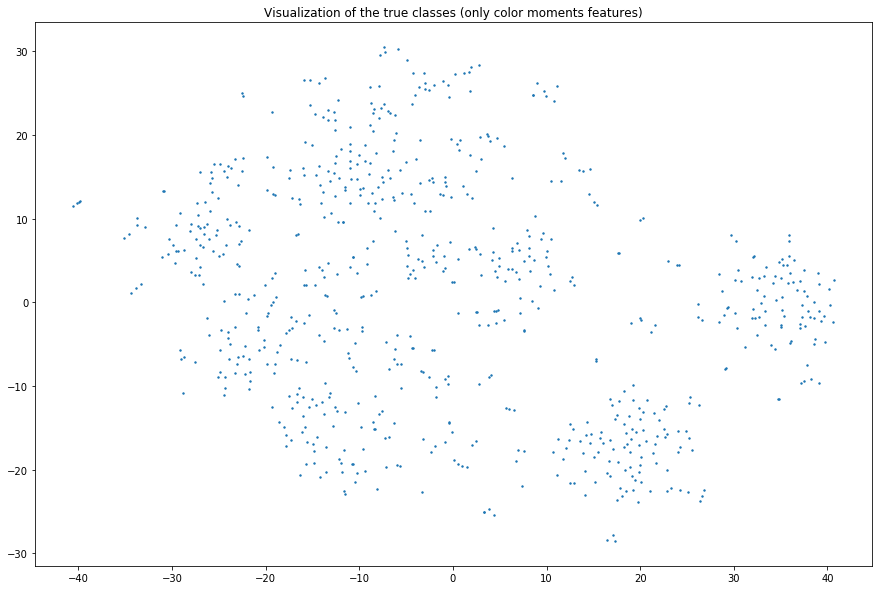

In [4]:
# *********************Visualization**********************
X_embedded = TSNE(n_components=2).fit_transform(X_norm)

plt.figure(figsize=(15,10))
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2)
plt.title("Visualization of the true classes (only color moments features)")
plt.show()

In [5]:
np.save("color_features.npy", X_norm)

In [3]:
X = np.load("color_features.npy")

## Distance Euclidienne

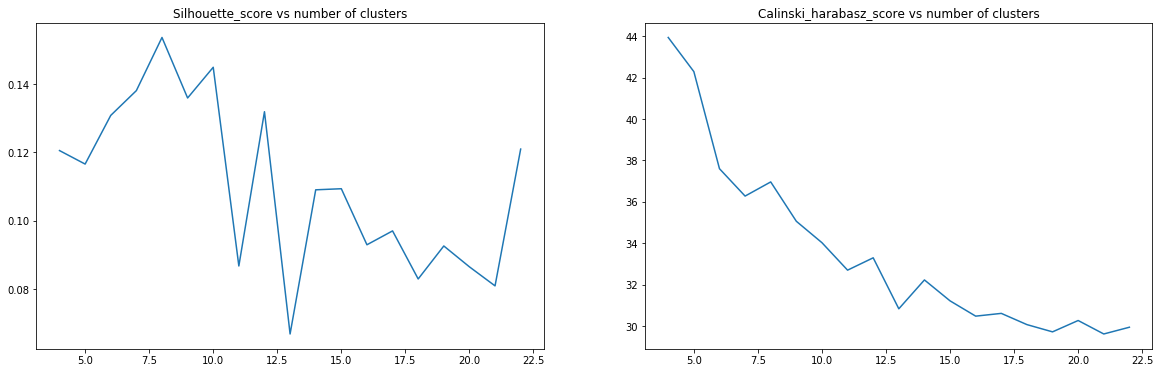

In [25]:
from KMeans_Clustering import kmeans_pp, kmeans_clustering_sklearn
from sklearn import metrics

# ********************Clustering************************
silhouette_score_list_kmeans = []
calinski_harabasz_score_list_kmeans = []
n_clusters_max = 20
n_clusters_min = 4
n_clusters_list = np.arange(n_clusters_max-1)+ n_clusters_min
metric_ = "euclidean"
n_init = 3

for k in n_clusters_list:
    classes = kmeans_clustering_sklearn(X,k)
#     classes = kmeans_pp(X,k,n_init,metric_)
    silhouette_score_list_kmeans.append(silhouette_score(X,classes))
    calinski_harabasz_score_list_kmeans.append(calinski_harabasz_score(X,classes))
    
    
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(n_clusters_list, silhouette_score_list_kmeans)
ax1.set_title("Silhouette_score vs number of clusters")
ax2 = plt.subplot(1,2,2)
ax2.plot(n_clusters_list, calinski_harabasz_score_list_kmeans)
ax2.set_title("Calinski_harabasz_score vs number of clusters")
plt.show()

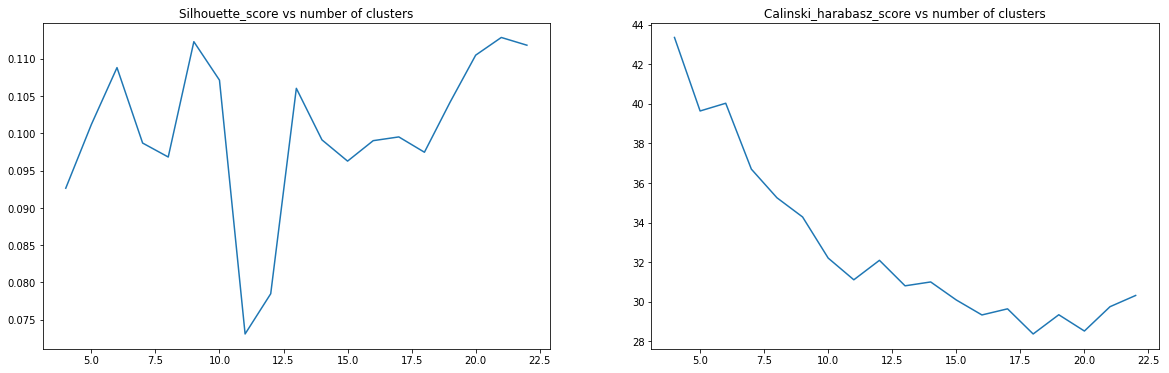

In [7]:
from Spectral_Clustering import spectralClustering_rbf
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# ********************Clustering************************
silhouette_score_list_spectral = []
calinski_harabasz_score_list_spectral = []
n_clusters_max = 20
n_clusters_min = 4
n_clusters_list = np.arange(n_clusters_max-1)+ n_clusters_min
metric_ = "euclidean"
gamma_ = 1e-4

for k in n_clusters_list:
    classes = spectralClustering_rbf(X, k, metric_, gamma_)
    silhouette_score_list_spectral.append(silhouette_score(X,classes))
    calinski_harabasz_score_list_spectral.append(calinski_harabasz_score(X,classes))
       
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(n_clusters_list, silhouette_score_list_spectral)
ax1.set_title("Silhouette_score vs number of clusters")
ax2 = plt.subplot(1,2,2)
ax2.plot(n_clusters_list, calinski_harabasz_score_list_spectral)
ax2.set_title("Calinski_harabasz_score vs number of clusters")
plt.show()

In [33]:
from DBSCAN_Clustering import dbscan_clustering_sklearn
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# ********************Clustering************************

minPts_array = np.array([3,4,5,6,7,8])
eps_array = np.arange(2,10,0.5)
silhouette_score_array_dbscan = np.zeros((len(minPts_array),len(eps_array)))
calinski_harabasz_score_array_dbscan = np.zeros((len(minPts_array),len(eps_array)))
metric_ = "euclidean"

for i in range(len(minPts_array)):
    for j in range(len(eps_array)):
        classes=dbscan_clustering_sklearn(X,eps_array[j],minPts_array[i],metric_)
        silhouette_score_array_dbscan[i,j] = silhouette_score(X,classes)
        calinski_harabasz_score_array_dbscan[i,j] = calinski_harabasz_score(X,classes)

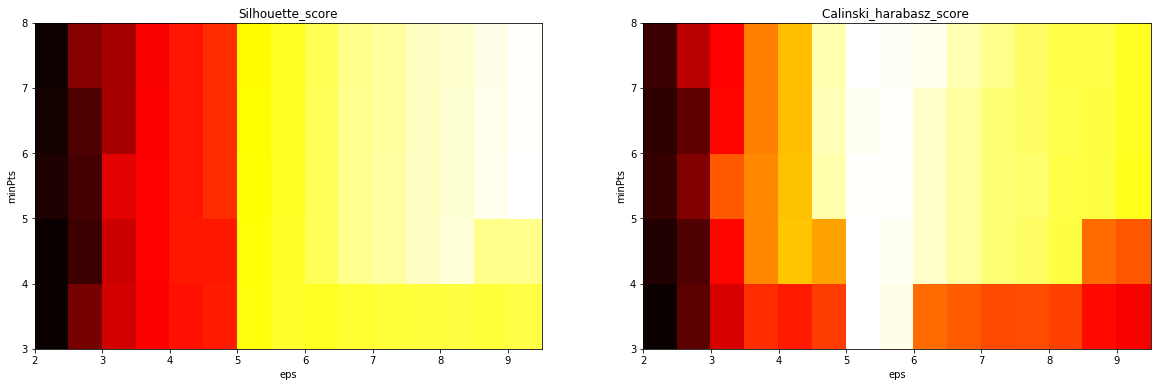

In [34]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
ax1.pcolormesh(eps_array, minPts_array,silhouette_score_array_dbscan,cmap='hot')
ax1.set_title("Silhouette_score")
ax1.set_xlabel("eps")
ax1.set_ylabel("minPts")
ax2 = plt.subplot(1,2,2)
ax2.pcolormesh(eps_array, minPts_array,calinski_harabasz_score_array_dbscan,cmap='hot')
ax2.set_title("Calinski_harabasz_score ")
ax2.set_xlabel("eps")
ax2.set_ylabel("minPts")
plt.show()